In [ ]:
#start

 **About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
import numpy as np        #NECESSARY LIBRARY IMPORTING
import functools as f
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/aerofit_treadmill.csv')     #UPLOADING THE DATA
df.head()         #WILL SHOW THE TOP 5 ROWS OF THE DATA



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


df.shape will give the no of rows and column. **SO THERE ARE 180 ROWS AND 9 COLUMNS**

In [ ]:
df.shape


(180, 9)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**we can see that there are no null values in any column and most of the data type are int type**


Below is the boxplot of 'Age' column.
Looking at the boxplot we can say that there are few outliers. Most of the people buying the product are of age between 24 and 35.
**This suggests that people from 24 and 34 are mostly the buyers. so by giving discounts or some other kind of benefits people between the age 34 to 44 should buy the products and become more health concious**

<Axes: ylabel='Age'>

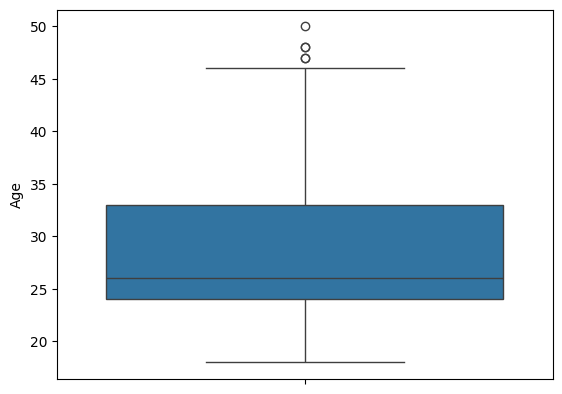

In [ ]:
sns.boxplot(df['Age'])

The below boxplot of education suggests following:
1.The buyers having higher education are having higher income.
2.Higher income people are having KP781.
3.Among male and females, males are having higher income.
**Suggestions:
**The salesman should pitch KP781 if a person is highly educated or have high income**

<Axes: xlabel='Education', ylabel='Income'>

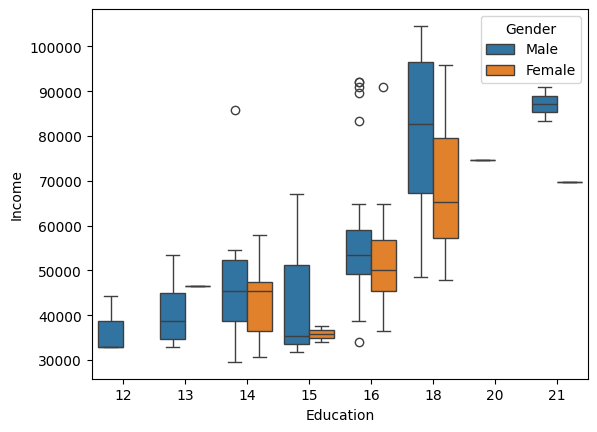

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Gender',data=df)

Below is the countplot of marital status which shows that most of the buyers are partnered . **so strategy should be made to attract more and more partnered people  as they are mostly the buyers.**

<Axes: xlabel='count', ylabel='MaritalStatus'>

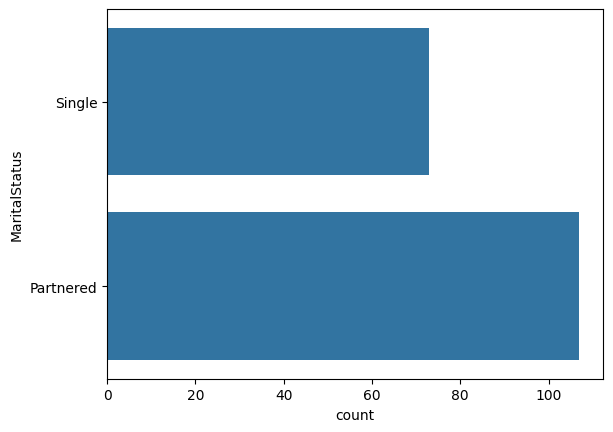

In [ ]:
sns.countplot(data=df['MaritalStatus'])

Below is the boxplot of income of the buyers which shows that the most of the buyers have income between 4200 and 6000. There are few outliers whose income ranges from 8000 and 10500.**the boxplot of income suggests that people who are having high income are interested in buying the treadmill. so proper strategy should be made so to attract high income people**

<Axes: ylabel='Income'>

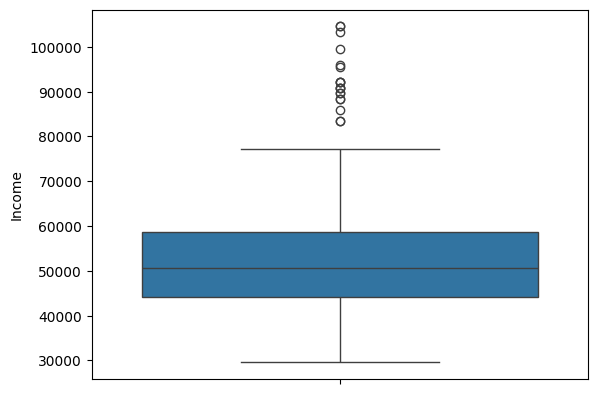

In [ ]:
sns.boxplot(df['Income'])

The below boxplot suggests that people from the gender are buying KP781 if they have high income

<Axes: xlabel='Gender', ylabel='Income'>

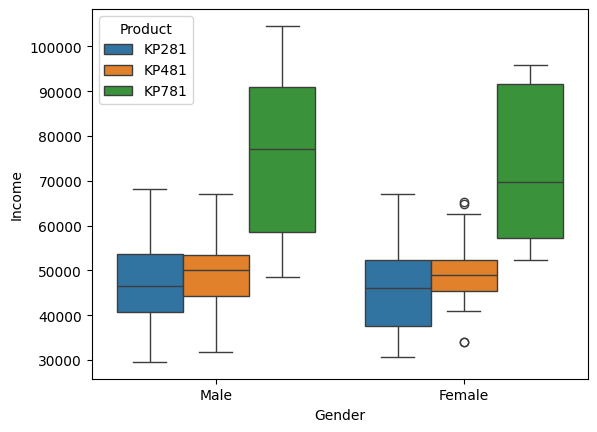

In [ ]:
sns.boxplot(x='Gender',y='Income',hue='Product',data=df)

though we have already seen which of the columns are having ouliers but there is one more way to detect outliers. if the mean and median of any column is having high differnce then outliers is present in that column but we can see that none of the columns are having high difference which means the outliers are very less and not impacting the data

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


The below is countplot of Gender and count for each product.
**The plot shows that there is hardly any effect of Gender on purchase, but there is differnce in product KP781 where female customers are buying this product very less may be because of its high cost**
*So here some discounts should be given to female customers on the product KP781 for some days. when they have the habit of KP781,they will always buy this*

<Axes: xlabel='Gender', ylabel='count'>

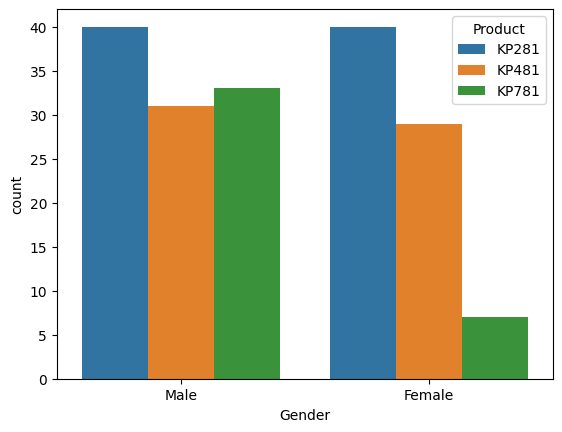

In [ ]:
sns.countplot(x='Gender',hue='Product',data=df)

By looking at the below graph it can be concluded that marital status is affecting the product buying. the partnered people are buying more products

<Axes: xlabel='MaritalStatus', ylabel='count'>

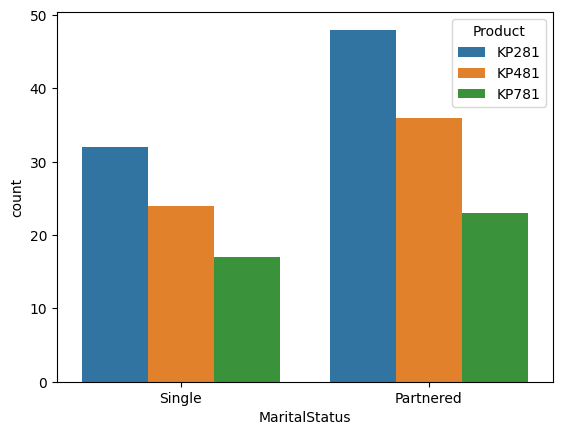

In [ ]:
sns.countplot(x='MaritalStatus',hue='Product',data=df)

The below table shows us what is the percentage of people buying each product

In [ ]:
a=df['Product'].value_counts().reset_index()
a['percentage_buying']=a['count']/len(df)*100
a

,Product,count,percentage_buying
0,KP281,80,44.444444
1,KP481,60,33.333333
2,KP781,40,22.222222


Below is the heat map of the numerical columns of the data
**the heat map below shows that the usage ,miles and fitness are highly correlated with each other**

<Axes: >

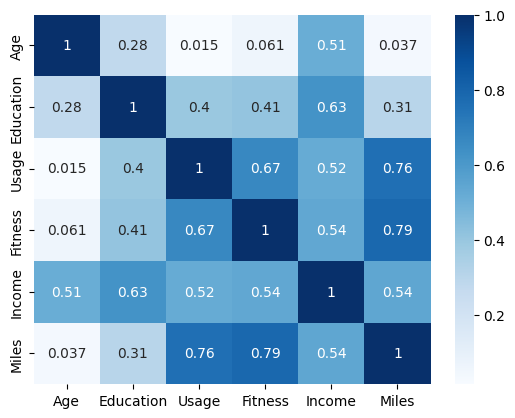

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]
sns.heatmap(numerical_df.corr(), cmap='Blues', annot=True)


By looking below the count plot we can easily say that the male and female customers have same  buying probability for the product KP 281 and also the KP 481 but their buying probability for KP 781 is different.So we can see that the male customers are buying more KP 781 than the female customers

**So we can say that what could be the probability of that a male customer buys a product KP 781 is high.so according to that we can show this product to male customers more likely**

<Axes: xlabel='Gender', ylabel='count'>

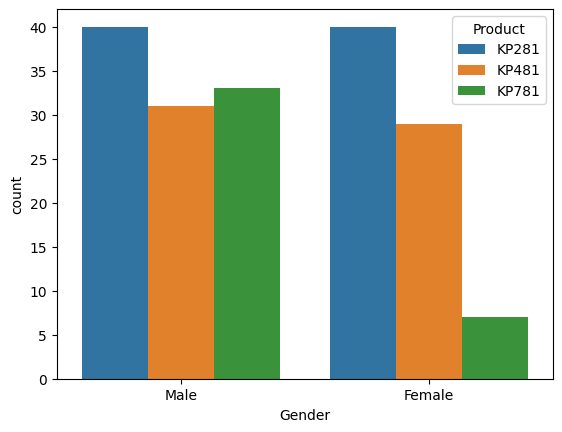

In [ ]:
sns.countplot(x='Gender',hue='Product',data=df)


b['count']['Gender'=='Male']

Below is the data how many male or female customers have bought the different products

In [ ]:
pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True)



Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


The below data gives the information:
1. probability of buying any of the products by a male customers is more(0.577) than females
2. the probability of buying KP281,KP481 by any male or female customers are almost same,but probability of buying KP781 by male customers are much more than by females.
Suggestions:
**The salesman should pitch about KP781 more to males **

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


below table gives us the following data:
1. Probability of buying a KP281 if it known that the customer is female ie P(KP281|female)= 0.526
2.Similarly P(KP481|female)= 0.381
3.P(KP781|female)= 0.092.. etc

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Below table gives the following information:
1. P(female|KP281)=0.5
2. P(female|KP781)=0.175 etc

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


**Business Insights and Recommendations from Aerofit Treadmill Data**:
1. **Product Popularity and Target Audience**:

KP281: This entry-level treadmill is the most popular, suggesting a large market for budget-friendly options. Both genders and marital statuses purchase it relatively equally.
KP481: This mid-level treadmill attracts a similar customer base to the KP281 but is slightly less popular.
KP781: This advanced treadmill is the least purchased, likely due to its higher price. Notably, males and partnered individuals with higher income and education levels are more likely to purchase this model.
Business Impact: Aerofit can use this information to tailor marketing campaigns and sales strategies for each product. They could focus on highlighting affordability for the KP281, performance for the KP481, and advanced features and exclusivity for the KP781.

2. **Customer Demographics and Product Choice**:

Income and Education: Higher-income individuals with higher education levels are more inclined towards the KP781. This suggests that premium features and quality are important to this customer segment.
Gender: While both genders purchase treadmills, there's a noticeable difference in KP781 purchases, with males being more likely to buy it. This could be due to factors like fitness goals, product preferences, or marketing strategies.
Marital Status: Partnered individuals are more likely to purchase treadmills overall, indicating that families or couples may be a key target market.
Business Impact: Aerofit can refine its customer segmentation and target specific demographics with personalized messages. They might offer financing options to make the KP781 more accessible or create marketing materials that resonate with the needs and preferences of male customers.

3. **Product Recommendations and Sales Strategies**:

Sales representatives can use the insights on customer characteristics to recommend suitable treadmills. For instance, they could steer high-income, educated male customers towards the KP781, while focusing on affordability and basic features for customers interested in the KP281.
Aerofit can leverage the correlation between usage, miles, and fitness to promote the benefits of regular exercise. This could involve creating content or programs that encourage customers to track their progress and stay motivated.
Business Impact: By improving product recommendations and sales strategies, Aerofit can increase customer satisfaction and potentially drive sales.

4. **Potential Areas for Improvement**:

Attract more female customers to the KP781: Aerofit could explore reasons for the lower purchase rate among women and address potential barriers like price sensitivity or marketing messages.
Engage single customers: While partnered individuals are the primary buyers, Aerofit can explore strategies to attract single customers by highlighting individual fitness benefits or offering tailored promotions.
Business Impact: By addressing these areas, Aerofit can expand its customer base and increase overall market share.

In [ ]:
#end